# Dataset Mushroom Classification
    meskipun set data ini pada awalnya berkontribusi pada repositori UCI Machine Learning hampir 30 tahun yang lalu, perburuan jamur (atau dikenal sebagai "shrooming") sedang menikmati popularitas baru. Fitur mana yang mengeja kematian tertentu dan yang paling cocok dalam dataset karakteristik jamur ini,
    Keluarga Agaricus dan Lepiota yang hidup liar dapat dikonsumsi dan bahkan digunakan sebagai obat-obatan Metode identifikasi jamur yang telah dilakukan menggunakan algoritma Naïve Bayes dan Voting Feature Interval (VFI5) dengan akurasi prediksi 99,552% dan 84,53% 
    Dataset ini mencakup uraian sampel hipotetis yang sesuai dengan 23 spesies jamur yang dipanggang di Agaricus dan Lepiota Family Mushroom yang diambil dari The Audubon Society Field Guide hingga North American Mushroom (1981). Setiap spesies diidentifikasi sebagai dapat dimakan, pasti beracun, atau tidak dapat dimakan dan tidak direkomendasikan. Kelas yang terakhir ini dikombinasikan dengan yang beracun. Panduan ini dengan jelas menyatakan bahwa tidak ada aturan sederhana untuk menentukan kelayakan jamur; tidak ada aturan seperti "selebaran tiga, biarlah '' untuk Poisonous Oak dan Ivy.

Periode waktu: Disumbangkan ke UCI ML 27 April 1987
#### NAMA : Fahrul Ravi
#### NIM :09011281722053
#### KELAS : SK5A
#### MATA KULIAH : Actificial Intilegence

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder # ngubah categori ke angka
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


### Berikut adalah Daftar-daftar Modul yang digunakan:

##### Numpy
untuk melakukan beberapa fungsi matematika seperti array, dan matriks.Pada progam ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks.

##### Matplotlib
untuk mencetak grafik di berbagai event seperti grafik distribusi variabel, grafik confusion matrix,grafik akurasi, dan yang lainnya.

##### Keras
untuk membuat, menambah, dan mengevaluasi model neural network.

##### Sklearn
merupakan salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti preprocessing, dan lainnya.

Memasukkan dataset yang akan digunakan
Informasi dataset
Dataset dapat didownload pada
https://www.kaggle.com/uciml/mushroom-classification

In [2]:
df = pd.read_csv ('D:/FILE KULIAH/Semester 5/AI/UAS/mushrooms.csv') 

Digunakan untuk load dataset dengan nama "mushrooms.csv".

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Informasi Atribut: (kelas: dapat dimakan = e, beracun = p)

- bentuk topi: bel = b, kerucut = c, cembung = x, datar = f, kenop = k, cekung = s
- tutup-permukaan: berserat = f, alur = g, bersisik = y, halus = s
- warna topi: coklat = n, buff = b, kayu manis = c, abu-abu = g, hijau = r, pink = p, ungu = u, merah = e, putih = w, kuning = y
- memar: memar = t, no = f
- bau: almond = a, adas = l, creosote = c, amis = y, busuk = f, apak = m, tidak ada = n, pedas = p, pedas = s
- lampiran-insang: terlampir = a, turun = d, bebas = f, berlekuk = n
- jarak insang: dekat = c, ramai = w, jauh = d
- ukuran insang: luas = b, sempit = n
- warna insang: hitam = k, coklat = n, buff = b, coklat = h, abu-abu = g, hijau = r, oranye = o, merah muda = p, ungu = u, merah = e, putih = w, kuning = w y
- tangkai-bentuk: memperbesar = e, meruncing = t
- root-root: bulbous = b, club = c, piala = u, sama = e, rhizomorphs = z, berakar = r, hilang =?
- tangkai-permukaan-atas-cincin: berserat = f, bersisik = y, halus = k, halus = s
- tangkai-permukaan-di bawah-cincin: berserat = f, bersisik = y, halus = k, halus = s
- tangkai-warna-atas-cincin: coklat = n, buff = b, kayu manis = c, abu-abu = g, oranye = o, merah muda = p, merah = e, putih = w, kuning = y
- tangkai-warna-di bawah-cincin: coklat = n, buff = b, kayu manis = c, abu-abu = g, oranye = o, merah muda = p, merah = e, putih = w, kuning = y
- tipe kerudung: sebagian = p, universal = u
- kerudung-warna: coklat = n, oranye = o, putih = w, kuning = y
- cincin-angka: tidak ada = n, satu = o, dua = t
- tipe-cincin: jaring laba-laba = c, evanescent = e, flaring = f, besar = l, tidak ada = n, liontin = p, selubung = s, zona = z
- spora-cetak-warna: hitam = k, coklat = n, buff = b, coklat = h, hijau = r, oranye = o, ungu = u, putih = w, kuning = y
- populasi: berlimpah = a, berkerumun = c, banyak = n, tersebar = s, beberapa = v, soliter = y
- habitat: rumput = g, daun = l, padang rumput = m, jalur = p, perkotaan = u, limbah = w, kayu = d

In [4]:
label = LabelEncoder()
df_encoded = df.apply(label.fit_transform)

In [5]:
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
df.shape

(8124, 23)

In [7]:
x= df_encoded.iloc[:,1:22].values
y = df_encoded.iloc[:,0].values

In [8]:
x

array([[5, 2, 4, ..., 4, 2, 3],
       [5, 2, 9, ..., 4, 3, 2],
       [0, 2, 8, ..., 4, 3, 2],
       ...,
       [2, 2, 4, ..., 4, 0, 1],
       [3, 3, 4, ..., 0, 7, 4],
       [5, 2, 4, ..., 4, 4, 1]])

In [9]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=2)

In [11]:
model = Sequential()
model.add(Dense(units= 100, input_dim =21 , activation='relu'))
model.add(Dense(units= 100, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [12]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## Proses Training

In [13]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, 
                         epochs=11)

Train on 7311 samples, validate on 813 samples
Epoch 1/11
7311/7311 [==============================] - 2s 216us/step - loss: 0.4584 - accuracy: 0.7939 - val_loss: 0.3124 - val_accuracy: 0.8696
Epoch 2/11
7311/7311 [==============================] - 1s 202us/step - loss: 0.2558 - accuracy: 0.9100 - val_loss: 0.2128 - val_accuracy: 0.9274
Epoch 3/11
7311/7311 [==============================] - 1s 196us/step - loss: 0.1833 - accuracy: 0.9427 - val_loss: 0.1590 - val_accuracy: 0.9594
Epoch 4/11
7311/7311 [==============================] - 2s 231us/step - loss: 0.1419 - accuracy: 0.9609 - val_loss: 0.1275 - val_accuracy: 0.9680
Epoch 5/11
7311/7311 [==============================] - 2s 285us/step - loss: 0.1153 - accuracy: 0.9687 - val_loss: 0.1032 - val_accuracy: 0.9779
Epoch 6/11
7311/7311 [==============================] - 2s 305us/step - loss: 0.0939 - accuracy: 0.9736 - val_loss: 0.0841 - val_accuracy: 0.9791
Epoch 7/11
7311/7311 [==============================] - 2s 308us/step - loss:

In [14]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

813/813 [==============================] - 0s 74us/step


[0.02796508849748533, 0.9975399971008301]

## Menampilkan grafik dataset

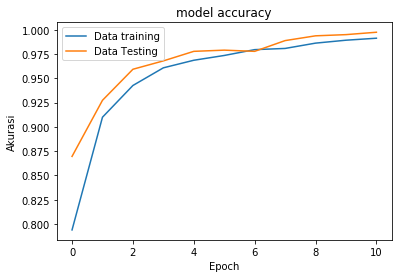

In [15]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

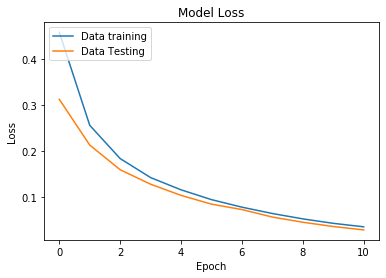

In [16]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [19]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[408   0]
 [  2 403]]


In [20]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

# Hasil Testing

In [21]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  0.9951219512195122
F1 :  0.9975550122249389
sensitivity :  0.9951219512195122
akurasi :  0.997539975399754


Akurasinya adalah :  0.997539975399754

# Terima kasih